# Accessing established file formats with `pandas`

Felix Fritzen (fritzen@simtech.uni-stuttgart.de)

### Content
- use pandas to access spreadsheet data (e. g. Microsoft Excel)
- access local and remote files
- basic operations on the data

In [47]:
import sys
import numpy as np
import pandas
import datetime
import matplotlib.pyplot as plt

## Example 1: Read `csv` file

`csv` $\blacktriangleright$ comma separated values

*data source:* https://www.kaggle.com/lachmann12/world-population-demographics-by-age-2019

**WARNING** the original file was corrupted and needed fixing in order to have proper row-assignments


Text(0.5, 1.0, 'Population age in Germany (as of 2019)')

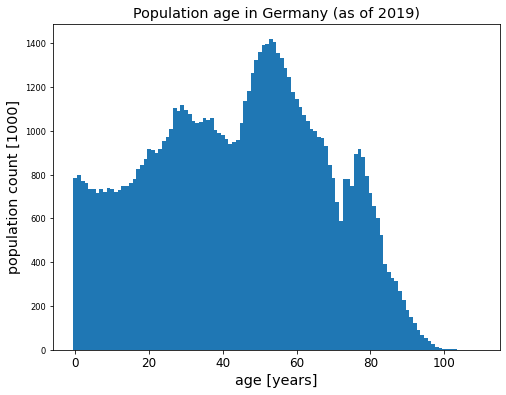

In [16]:
# read raw data and keep only the relevant columns:
raw_data = pandas.read_csv('data/world_demographics.csv')[['Country','Value','Age']]

#%%
# filter the data by country
data    = raw_data[raw_data.Country.eq('Germany') ]
age     = data['Age'].values
#print(age)
sort_idx= np.argsort(age)
#print(sort_idx)
age     = age[sort_idx]
#print(age)
population = data['Value'].values[sort_idx]

params = {  'axes.titlesize' : 'x-large', \
            'axes.labelsize' : 'x-large', \
            'xtick.labelsize' : 'large', \
            'ytick.labelsize' : 'small', \
         }
plt.rcParams.update(params)
fig = plt.figure( figsize = (8,6))
plt.bar( age, population/1000, width=1 )
plt.xlabel('age [years]')
plt.ylabel('population count [1000]')
plt.title('Population age in Germany (as of 2019)')

### simple processing of the data
- get the number of people for which data is available
- how many people under 18 live in Germany? (absolute/relative)
- how many people were born during world war 2 (1939-1945), i.e. are aged 74-80?

In [45]:
tot_pop = population.sum()
young_pop = population[age<=18].sum()
ww2_pop = population[np.logical_and( age>=74 , age <= 80 )].sum()
print('total population             %8d k' % (tot_pop/1000) )
print('... thereof kids/youngsters  %8d k   (%4.1f%%)' % ( young_pop/1000, young_pop*100./tot_pop) )
print('... born 1939-1945           %8d k   (%4.1f%%)' % ( ww2_pop/1000, ww2_pop*100./tot_pop) )

total population                82792 k
... thereof kids/youngsters     14380 k   (17.4%)
... born 1939-1945               5731 k   ( 6.9%)


## Example 2: Access Excel sheet via URL

- load Excel sheet directly from the web
- process the data an show some results
- data represents the most recent Covid-19 numbers provided by the ECDC

In [56]:
rawData = pandas.read_excel('https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/xlsx/data.xlsx')

country = 'DE'
filtered_data = rawData[rawData['geoId'] == country]

# extract some relevant data
year    = filtered_data['year'].values
month   = filtered_data['month'].values
day     = filtered_data['day'].values
n       = year.shape[0]
cases   = filtered_data['cases'].values
yearvalue = filtered_data['year'].unique()
print('year = ', year)
print('month = ', month)
print('day = ', day)
print('n = ', n)
print('cases = ', cases)
print('yearvalue = ', yearvalue)

year =  [2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021
 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021
 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021
 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021
 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021
 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021
 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021
 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021
 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021
 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021
 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021
 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021
 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021
 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 202

### Basic operations on the data
- get the day of week
- explore the last number of cases for each day of the week

**Note:** Most recent data comes first

In [60]:
dow     = np.zeros(n)
   
for i in range(n):
    dow[i] = datetime.date(year[i], month[i], day[i]).isoweekday() - 1
print(dow)
DOW_name    = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

week_av = 0
for i in range(7):
    val = cases[dow==i][1]
    week_av += val/7
    print('%6d cases recorded last %s' % ( val, DOW_name[i] ) )

print('---------------------------------------------------------------------------------')
print('last week\'s average number of cases %d (most recent 7 day incidence: %.1f)' \
      % ( week_av, week_av / tot_pop * 1e5 * 7 ) )
print('(assumed population size %.2f Mio.)' % (tot_pop/1e6))

[3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1.
 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5.
 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2.
 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6.
 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3.
 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0.
 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4.
 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1.
 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5.
 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2.
 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0. 6. 5. 4. 3. 2. 1. 0.]
 15513 cases recorded last Monday
 21832 cases recorded last Tuesday
 39676 cases recorded last Wednesday
 50196 cases recorded last Thursday
 37120 cases recorded last Friday
 34002 cases recorded l

### Get the value range of a certain column
- which country code sare available?

In [8]:
country_id = rawData['geoId'].unique()
print(country_id)

['AT' 'BE' 'BG' 'HR' 'CY' 'CZ' 'DK' 'EE' 'FI' 'FR' 'DE' 'EL' 'HU' 'IS'
 'IE' 'IT' 'LV' 'LI' 'LT' 'LU' 'MT' 'NL' 'NO' 'PL' 'PT' 'RO' 'SK' 'SI'
 'ES' 'SE']
